# Intern- Riya Mehta

### Exploratory Data Analysis



Here we have performed few analysis on our dataset to find out the hot zone of terrorism, and derived all security issues and insights using EDA

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### STEP 1- Reading and Understanding the dataset

In [3]:
#Reading the dataset
dt=pd.read_csv('globalterrorismdb_0718dist.csv')

In [4]:
dt.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
#checking shape
dt.shape

(181691, 135)

In [6]:
dt.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [7]:
#checking info
dt.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [8]:
#checking % of null values
dt.isnull().sum()/len(dt)*100

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [9]:
#checking cols having more than 50% null values
null=dt.isnull().sum()/len(dt)*100
null=null[null.values>55.0]
null

approxdate            94.914993
resolution            98.778145
location              69.456385
alternative           84.032781
alternative_txt       84.032781
attacktype2           96.524869
attacktype2_txt       96.524869
attacktype3           99.764435
attacktype3_txt       99.764435
targtype2             93.866510
targtype2_txt         93.866510
targsubtype2          94.119136
targsubtype2_txt      94.119136
corp2                 94.431755
target2               93.934757
natlty2               94.040431
natlty2_txt           94.040431
targtype3             99.352747
targtype3_txt         99.352747
targsubtype3          99.396228
targsubtype3_txt      99.396228
corp3                 99.435305
target3               99.353298
natlty3               99.368708
natlty3_txt           99.368708
gsubname              96.758232
gname2                98.892075
gsubname2             99.911938
gname3                99.821675
gsubname3             99.988992
motive                72.171984
guncerta

### STEP 2- Data Cleaning

In [10]:
#dropping variables having null>50%
null=list(null[null.values>=50.0].index)
dt.drop(labels=null,inplace=True,axis=1)

In [11]:
#checking shape
dt.shape

(181691, 58)

In [12]:
#checking cols having NaN Values
dt.isna().sum()/len(dt)*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [13]:
#checking % of null values
dt.isnull().sum()/len(dt)*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [14]:
#filling Nan values
dt=dt.fillna(0)

In [15]:
#checking nulls
dt.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
claimed             0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus   

### STEP 3- Data Visualization

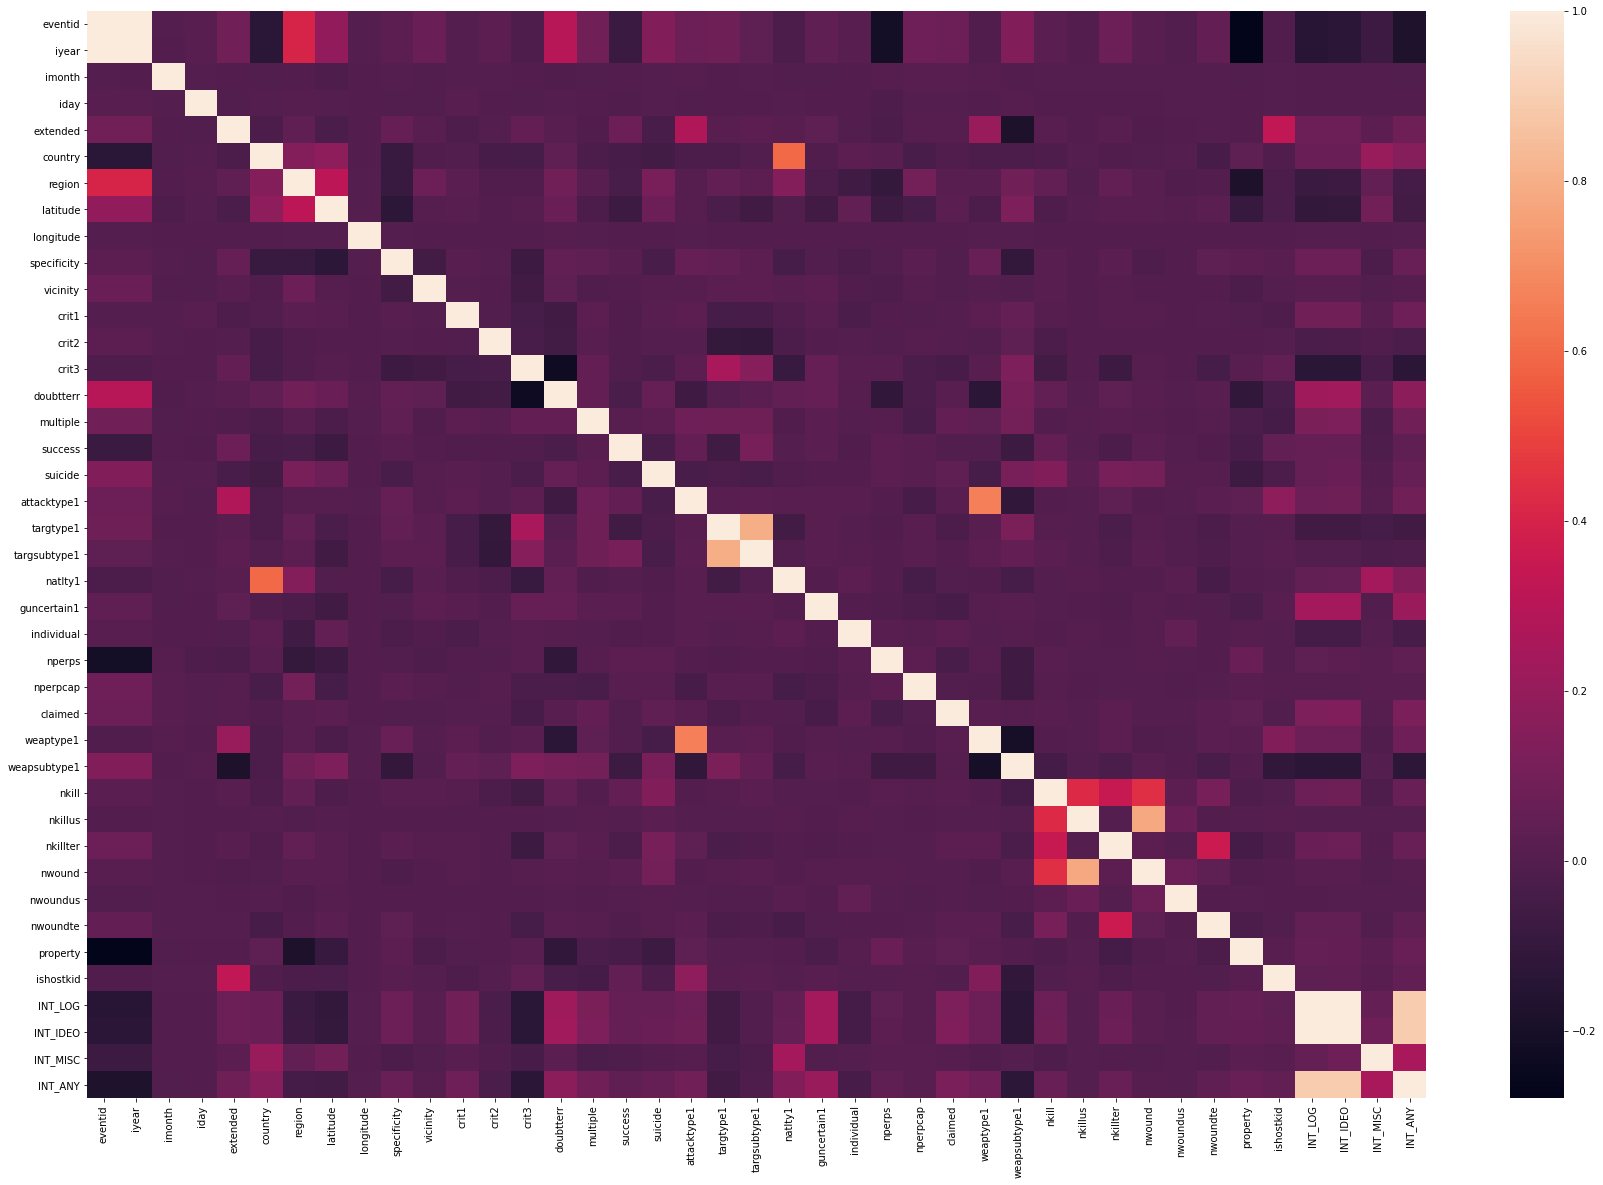

In [30]:
#plotting heatmap
fig,axes=plt.subplots(1,1,figsize=(30,20))
sns.heatmap(dt.corr())
plt.show()

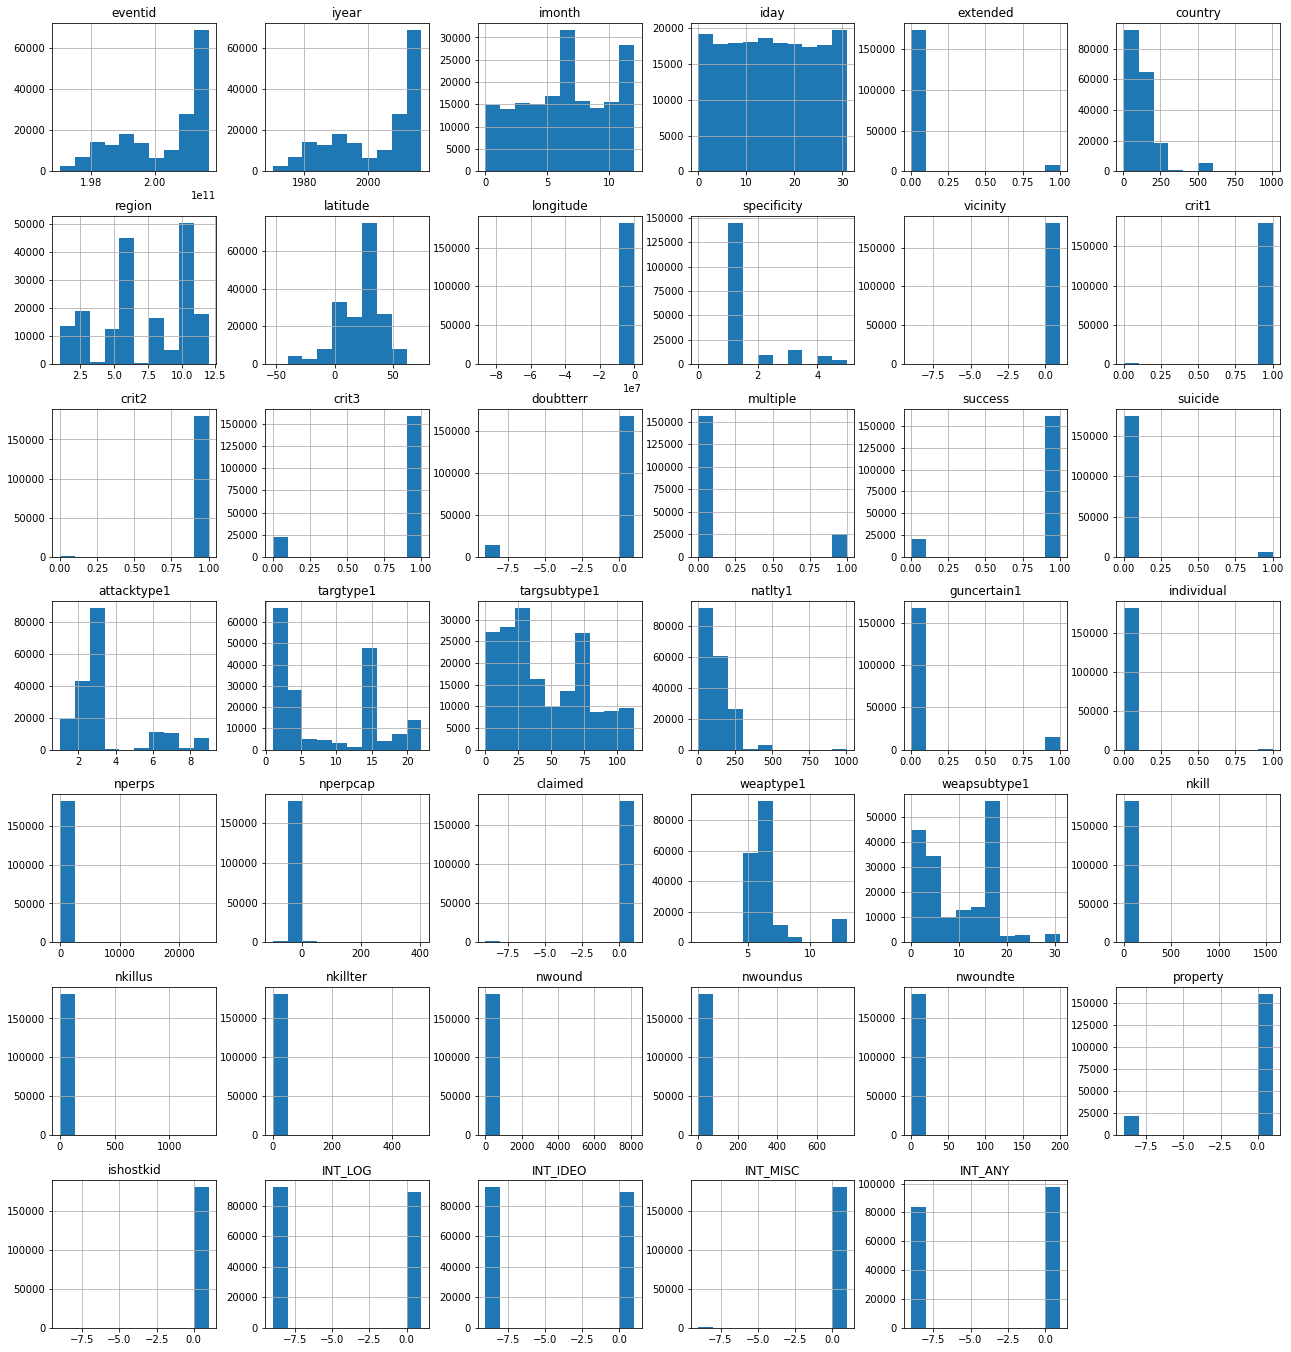

In [32]:
#plotting histograms
dt.hist(figsize=(22,24))
plt.show()

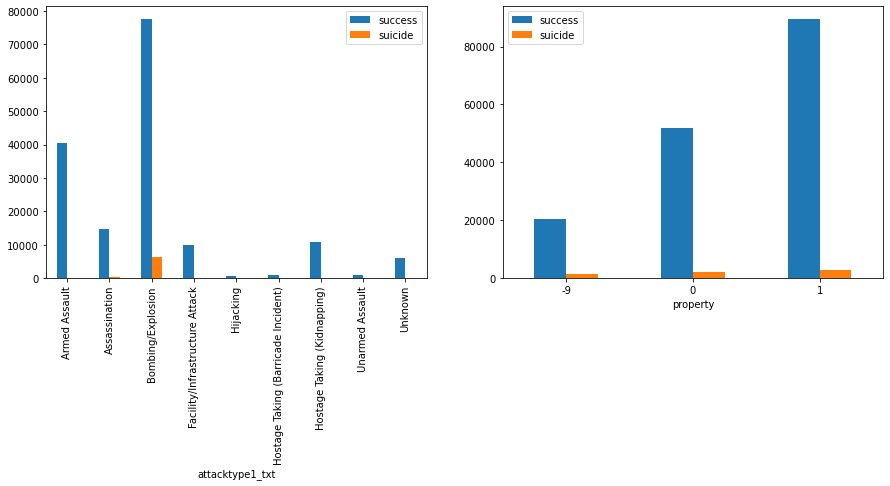

In [41]:
#plotting attacktype and property
fig,axes=plt.subplots(1,2,figsize=(15,5))
dt.groupby('attacktype1_txt')['success','suicide'].agg(sum).plot(kind='bar',ax=axes[0])
dt.groupby('property')['success','suicide'].agg(sum).plot(kind='bar',ax=axes[1])
plt.xticks(rotation=360)
plt.show()

<AxesSubplot:xlabel='weaptype1', ylabel='targtype1'>

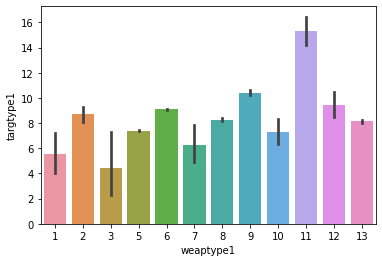

In [42]:
#plotting barplot for target and weapon
sns.barplot(x=dt['weaptype1'],y=dt['targtype1'])

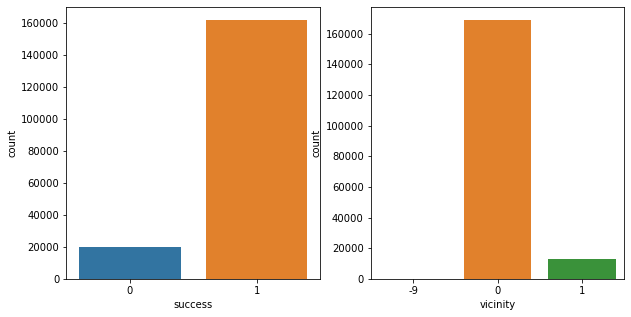

In [48]:
#plotting countplot for success and vicinity
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.countplot(dt.success,ax=axes[0])
sns.countplot(dt.vicinity,ax=axes[1])
plt.show()

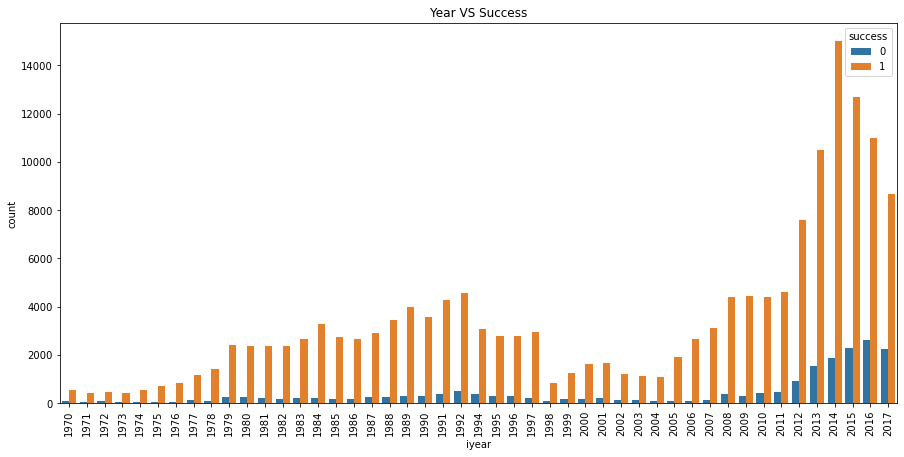

In [52]:
#plotting countplot for year vs success
fig,axes=plt.subplots(1,1,figsize=(15,7))
sns.countplot(dt['iyear'],hue=dt['success'])
plt.xticks(rotation=90)
plt.title('Year VS Success')
plt.show()

## Organisations with Highest Terror attacks

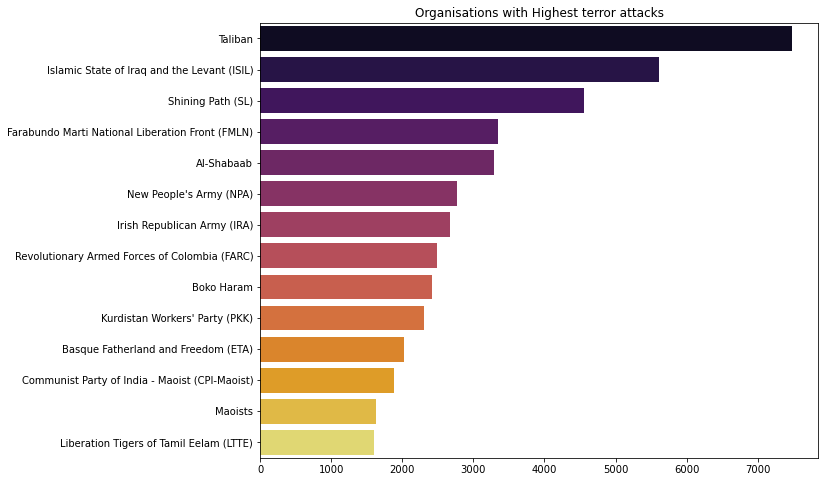

In [53]:
sns.barplot(dt['gname'].value_counts()[1:15].values,dt['gname'].value_counts()[1:15].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Organisations with Highest terror attacks')
plt.show()

## Countries affected by Terror attacks

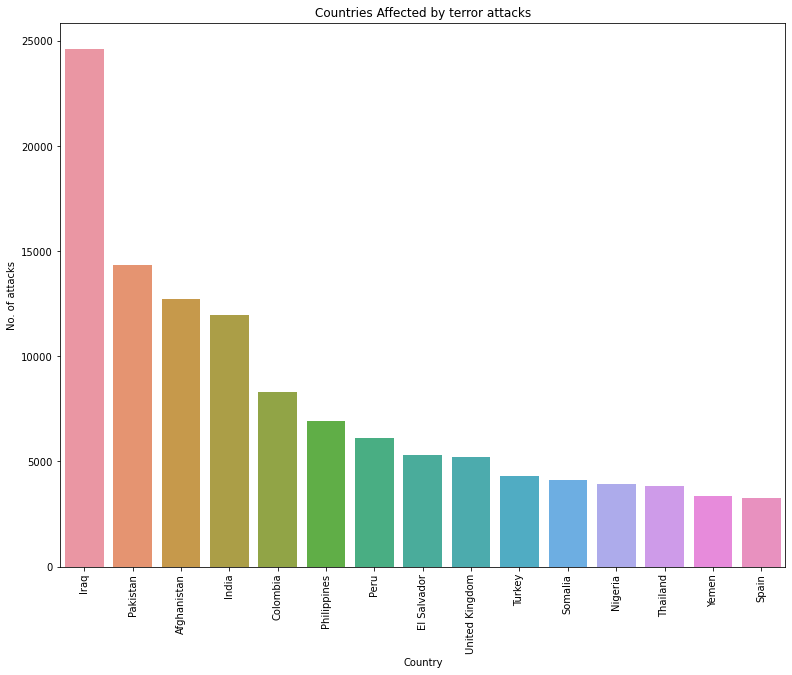

In [57]:
plt.figure(figsize=(13,10))
sns.barplot(x=dt['country_txt'].value_counts()[:15].index,y=dt['country_txt'].value_counts()[:15].values)
plt.xticks(rotation=90)
plt.title('Countries Affected by terror attacks')
plt.xlabel('Country')
plt.ylabel('No. of attacks')
plt.show()

## Top Regions affected by terrorism

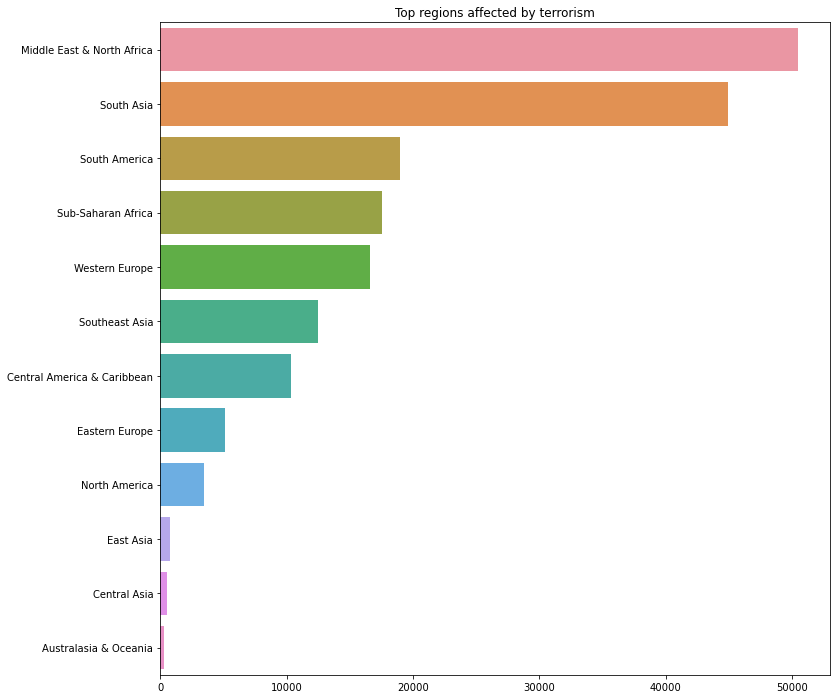

In [60]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=360)
sns.barplot(x=dt['region_txt'].value_counts().values,y=dt['region_txt'].value_counts().index)
plt.title('Top regions affected by terrorism')
plt.show()

## Cities attacked by terrorists

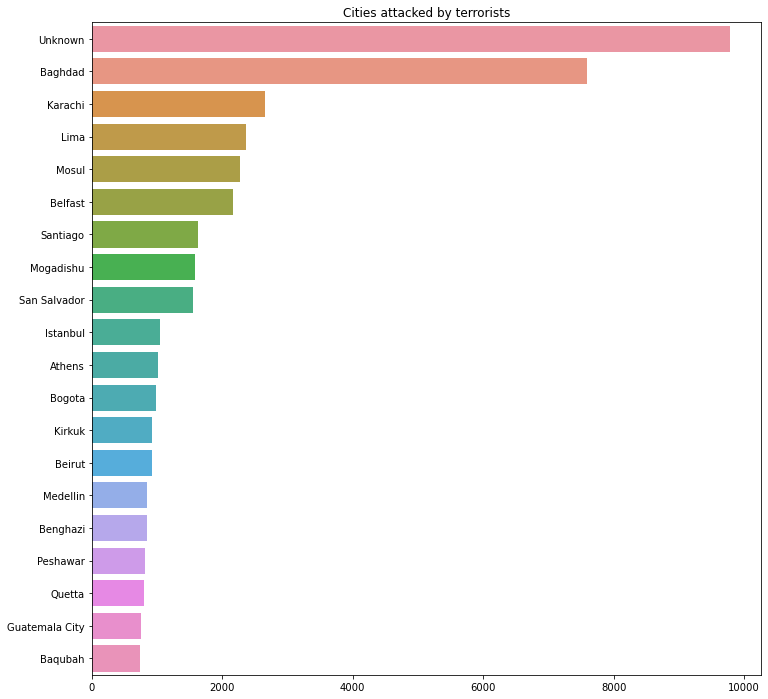

In [61]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=360)
sns.barplot(x=dt['city'].value_counts()[:20].values,y=dt['city'].value_counts()[:20].index)
plt.title('Cities attacked by terrorists')
plt.show()

## Attacks from the Year 1970 to 2017

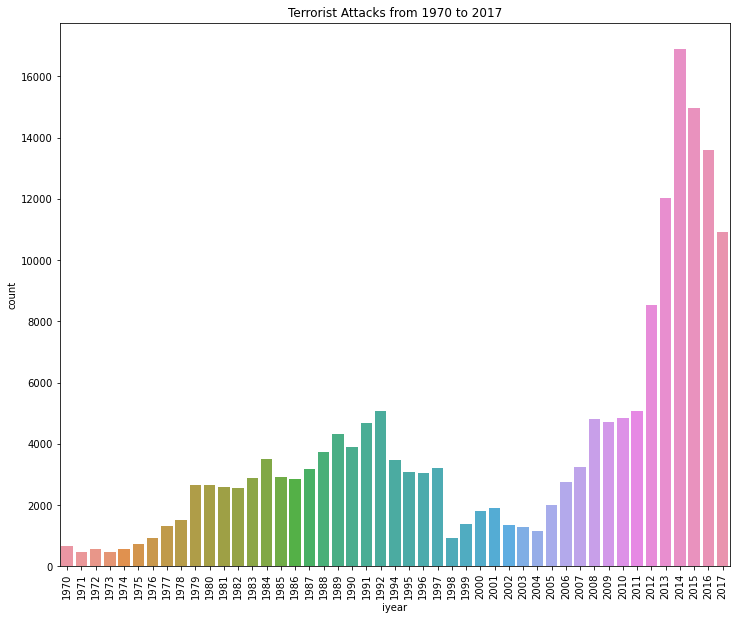

In [64]:
plt.subplots(1,1,figsize=(12,10))
sns.countplot(x=dt.iyear)
plt.xticks(rotation=90)
plt.title('Terrorist Attacks from 1970 to 2017')
plt.show()

## Weapons used by terrorists

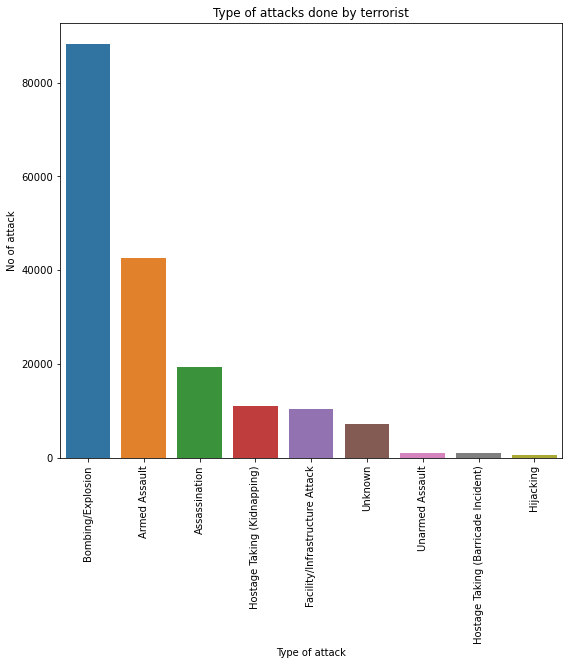

In [68]:
plt.figure(figsize=(9,8))
sns.countplot(x=dt['attacktype1_txt'],order=dt['attacktype1_txt'].value_counts().index)
plt.title('Type of attacks done by terrorist')
plt.xticks(rotation=90)
plt.xlabel('Type of attack')
plt.ylabel('No of attack')
plt.show()

## Target Attacks

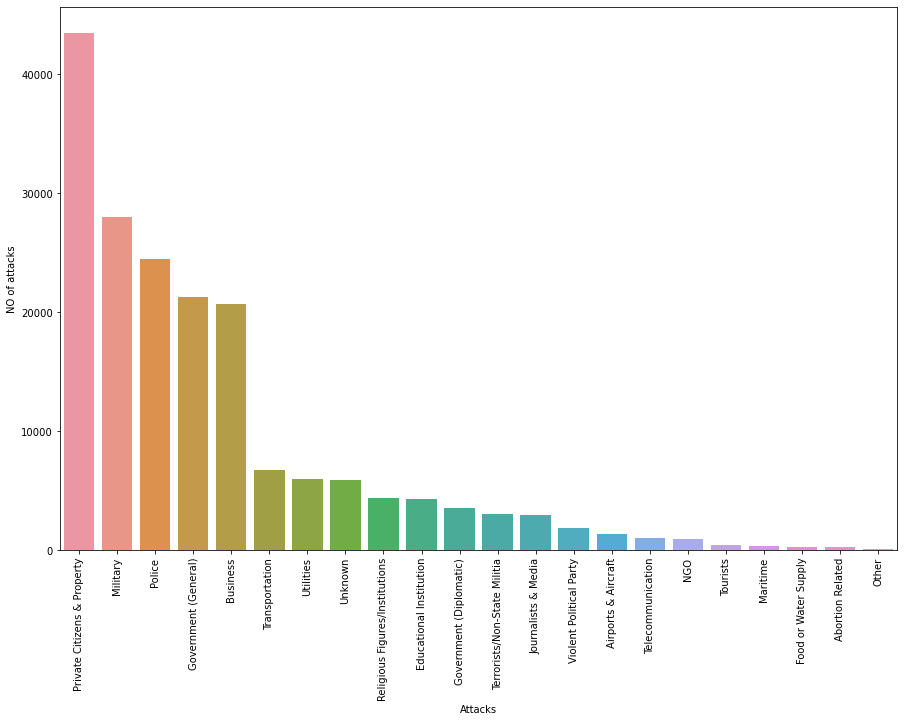

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x=dt['targtype1_txt'],order=dt['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attacks')
plt.ylabel('NO of attacks')
plt.show()

# CONCLUSION

1. The highest number of attacks where between 1988-1992 and 2008-2014

2. The organisation with highest terror attack are 'Taliban' and 'ISIL'

3. 'Iraq' country was the most affected by terrorism

4. 'Middle east and North Africa' were the most attacked regions

5. The most attacked cities are 'Baghdad', 'Karachi' and 'Lima'

6. 'Bombing / Explosion' is the widely used type for terrorist attack

7. 'Private citizens & property' were the most targeted in terrorist attacks